<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 5</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 23. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Die Zukunft richtig ausgependelt</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

In dieser Aufgabe studieren wir ein **Pendel im Schwerefeld** der Erde. In Polarkoordinaten ist die Bewegungsgleichung gegeben als

\begin{equation}
  \overset{..}{\phi}(t) = -\sin{\left(\phi(t)\right)}\nonumber,
\end{equation}

wobei $\phi$ den Auslenkungswinkel des Pendels parametrisiert und wir die Masse $m$ sowie die Gravitationskonstante $g$ auf $1$ gesetzt haben.

Die einfachste Methode, um eine Differentialgleichung zu lösen, sind die **Euler-Verfahren**. Implementieren Sie sowohl das *forward-* als auch das *backward-*Euler Verfahren und vergleichen Sie die Stabilität der Lösungen. Betrachten Sie dazu neben der Bahnkurve $\phi(t)$ auch die potentielle, kinetische und die Gesamtenergie und erklären Sie die Unterschiede zwischen den beiden Verfahren. Setzen Sie dazu den Zeitschritt $\Delta t = 0.1$, damit der Unterschied klar zur Geltung kommt.

**Hinweise**

Die zu bearbeitende Differentialgleichung ist zweiter Ordnung, deswegen müssen wir sie umformen in ein System von Differentialgleichungen erster Ordnung. Allgemein geschieht dies so, dass wir die Ableitung $n$-ter Ordnung, bezeichnet durch $y^{(n)}$, als Funktion der anderen Ordnungen auffassen:

\begin{equation}
y^{(n)} = f(x, y^{(1)}, \dots, y^{(n - 1)})
\end{equation}

Im nächsten Schritt führen wir dann Funktionen $z_i$ ein, die gleich den $(i-1)$-ten Ableitungen gesetzt werden, also

\begin{align*}
  z_1 &= y\\
  z_2 &= y^{(1)} \\
  &\dots\\
  z_n &= y^{(n-1)}.
\end{align*}

Die Ableitung von $z_i$ ist so gleich $z_{i + 1}$. Aus dem Vektor aller Ableitungen  $\overset{.}{\vec{z}} = (\overset{.}{z_1}, \dots, \overset{.}{z_n})$, erhält man so ein System mit $n$ gekoppelten Differentialgleichungen.

Für unser Pendel schreiben wir also $\overset{..}{\phi} = f(t, \phi, \overset{.}{\phi})= -\sin{\left(\phi\right)}$ und führen neue Funktionen $z_1, z_2$ ein:

\begin{align*}
  z_1 &= \phi\\
  z_2 &= \overset{.}{\phi}
\end{align*}

Das zu bearbeitende System lautet also:

\begin{align*}
  \overset{.}{z_1} &= z_2\\
  \overset{.}{z_2} &= \overset{..}{\phi} = -\sin{\left( z_1\right)}
\end{align*}

### Energieermittlung

In [1]:
function energies_pendulum(phi, phidot, phi_max, m=1, l=1, g=1)
    ### this function calculates the kinetic and potential energies for any mathematical pendulum
    
    # DAU alert
    size(phi) != size(phidot) && error("Error: energy_is_const: wrong number of phi or phidot values")
    # phi, phidot:    array
    # phi_max, m, l:  float
    
    T(phidot) = m*l^2*phidot^2/2
    V(phi) = m*g*l*(1-cos(phi))
    Ts = []
    Vs = []
    
    # calculate all values of T and V
    for i in 1:length(phi)
        push!(Ts, T(phidot[i]))
        push!(Vs, V(phi[i]))
    end
    
    return (Ts, Vs)
end

energies_pendulum (generic function with 4 methods)

### Forward Euler

In [2]:
function euler_2nd_order(fddot, phi_0, phidot_0, t_0, t_end, dt=1e-3)
    # f: \ddot\phi(t) = f(phi(t))
    # get time values
    times = collect(t_0:dt:t_end)

    # initialize output arrays
    phis    = []
    phidots = []

    # set marginal conditions
    push!(phis, phi_0)
    push!(phidots, phidot_0)
    
    for i in 2:length(times)
        # calc and save new value
        push!(phis, phis[i-1]+phidots[i-1]*dt)
        # calc and save new slope
        push!(phidots, phidots[i-1] + dt*fddot(phis[i-1]))
    end
    return (times, phis, phidots)
end

euler_2nd_order (generic function with 2 methods)

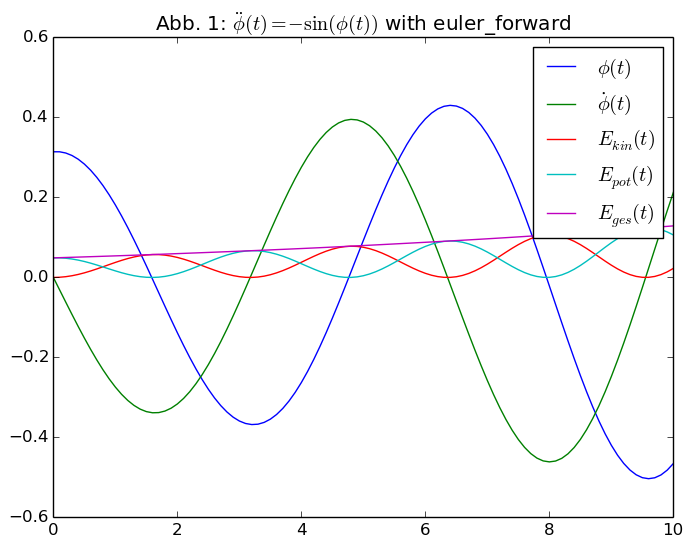

In [3]:
using PyPlot

figure()
title(L"Abb. 1: $\ddot{\phi}(t) = -\sin(\phi(t))$ with euler_forward")
xs, phis_fd, pdots_fd = euler_2nd_order(x->-sin(x), pi/10, 0, 0, 10, 0.1)
Ts_fd, Vs_fd = energies_pendulum(phis_fd, pdots_fd, pi/10)
plot(xs, phis_fd, label=L"\phi(t)")
plot(xs, pdots_fd, label=L"\dot{\phi}(t)")
plot(xs, Ts_fd, label=L"E_{kin}(t)")
plot(xs, Vs_fd, label=L"E_{pot}(t)")
plot(xs, Ts_fd+Vs_fd, label=L"E_{ges}(t)")
legend()
;

### Backward Euler

In [4]:
function euler_2nd_order_backward(fddot, phi_0, phidot_0, t_0, t_end, dt=1e-3)
    # f: \ddot\phi(t) = f(phi(t))
    # get solution from euler_forward
    times, phis, phidots = euler_2nd_order(fddot, phi_0, phidot_0, t_0, t_end, dt)

    return (times, reverse(phis), reverse(phidots))
end

euler_2nd_order_backward (generic function with 2 methods)

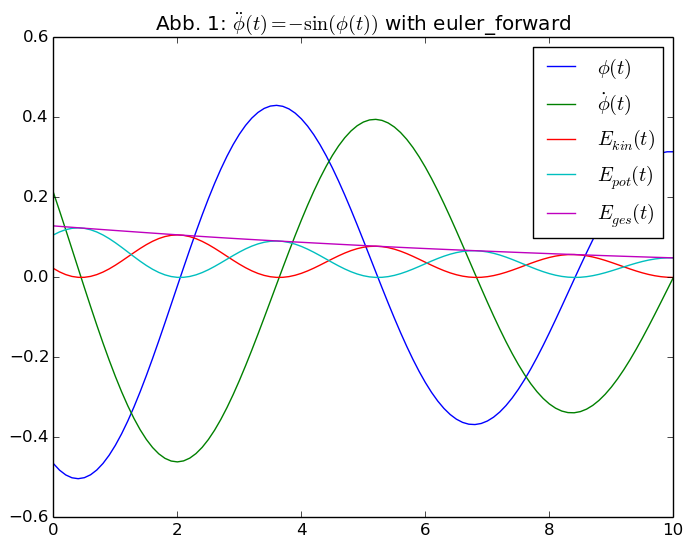

In [5]:
using PyPlot

figure()
title(L"Abb. 1: $\ddot{\phi}(t) = -\sin(\phi(t))$ with euler_forward")
xs_bk, phis_bk, pdots_bk = euler_2nd_order_backward(x->-sin(x), pi/10, 0, 0, 10, 0.1)
Ts_bk, Vs_bk = energies_pendulum(phis_bk, pdots_bk, pi/10)
plot(xs, phis_bk, label=L"\phi(t)")
plot(xs, pdots_bk, label=L"\dot{\phi}(t)")
plot(xs, Ts_bk, label=L"E_{kin}(t)")
plot(xs, Vs_bk, label=L"E_{pot}(t)")
plot(xs, Ts_bk+Vs_bk, label=L"E_{ges}(t)")
legend()
;

### Energieerhaltung

Die Energie ist in beiden Fällen *nicht* erhalten. Dies sieht man an dem Graphen für $E_{ges}$, der in Abb. 1 steigt und in Abb. 2 fällt. Man kann es aber auch schon an den Graphen für die Auslenkung und die Winkelgeschwindigkeit sehen: Die Amplitude (Hoch- / Tiefpunkte) verändert sich mit der Zeit. Ebenso verändert sich die Amplitude der kinetischen Energie.  
Dies liegt an dem Fehler, den die Euler-Methode beinhaltet.

### Vergleich der Methoden

Beide Methoden funktionieren vom System her gleich, nur die *backward*-Methode rechnet in die andere Richtung. D.h. bei der *forward*-Methode wird von einem Startwert (mit Anfangsbedingungen) an bis zu einem Endzeitpunkt gerechnet, bei der *backward*-Methode wird von einem Endwert (mit Endbedingungen) aus bis zu einem Startzeitpunkt an gerechnet. Somit wird auch der Fehler bei der *forward*-Methode gegen Ende größer und bei der *backward*-Methode am Anfang.

Der Fehler kommt folgendermaßen zustande:  
Es wird immer nur anhand der Ableitung und der vorher ermittelten Werte der nächste Punkt berechnet. Ein Vergleich mit dem aktuellen Funktionswert findet nicht statt, somit steigt der Fehler linear mit der Länge des berechneten Intervalls an. Dafür sinkt der Fehler ebenso linear mit der Schrittweite dt, wodurch das Problem verringert werden kann.